# Practica 3
## Eduardo Leonel Sanchez Velasco
## NC: 420004035

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from random import randint as rand
from skimage import io
from math import ceil, floor
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'

In [3]:
##Objetos y funciones globales necesarios
imagenes = {}
def get_histograma(img):
    img2 = img * 255
    img2 = np.rint(img2)
    y_space, x_space = img.shape
    tonalidades = dict.fromkeys(list(range(256)),0)
    for y in range(y_space):
        for x in range(x_space):
            tonalidades[img2[y][x]] += 1
    return tonalidades
def plot_img_histo(img,histograma):
    name, image = img
    fig = plt.gcf()
    fig.set_size_inches(10,5)
    plt.subplot(1,2,1)
    plt.title(name)
    plt.imshow(image)
    
    plt.subplot(1,2,2)
    plt.title(name)
    plt.bar(range(len(histograma)), list(histograma.values()), align='center',color = 'black')
    plt.show()
    
def plot_histo(histograma):
    fig = plt.gcf()
    fig.set_size_inches(10,5)
    plt.bar(range(len(histograma)), list(histograma.values()), align='center',color = 'black')
    plt.show()

In [4]:
##Funciones para ejercicio 1
def trans_neg(img):
    img2 = img.copy()*255
    img2 = np.rint(img2)
    y_space, x_space = img.shape
    for y in range(y_space):
        for x in range(x_space):
            img2[y][x] = 255 - img2[y][x]
    return img2/255

def trans_log(img):
    img2 = img.copy() * 255
    img2 = np.rint(img2)
    img2 = np.log1p(img2) * 46
    return np.rint(img2)/255

def trans_low_gamma(img):
    img2 = img.copy() * 255
    img2 = np.rint(img2)
    img2 = img2**0.4 * 27.8
    return np.rint(img2)/255

def trans_high_gamma(img):
    img2 = img.copy() * 255
    img2 = np.rint(img2)
    img2 = img2**2.2 * 0.00129
    return np.rint(img2)/255

In [5]:
## Ecualizacion
def get_acumulado(p_histo):
    acumulado = 0
    acumulados = dict.fromkeys(list(range(256)),0)
    for tonailidad in p_histo.keys():
        acumulado += p_histo[tonailidad]
        acumulados[tonailidad] = acumulado
    return acumulados
def get_probabiliades(histograma, size):
    probabilidades = dict.fromkeys(list(range(256)),0)
    for tonalidad in histograma.keys():
        probabilidades[tonalidad] = histograma[tonalidad]// size
    return probabilidades 

def get_img_ec(img):
    histograma = get_histograma(img)
    size = np.prod(img.shape)
    cdf = get_acumulado(get_probabiliades(histograma,size))
    img2 = img.copy() *255
    y_space, x_space = img2.shape
    for y in range(y_space):
        for x in range(x_space):
            img2[y][x] = cdf[img2[y][x]]
    return img2

In [6]:
rm=io.imread('images/ImagenFourier.png')/255
imagenes['ImagenFourier'] = rm
rm=io.imread('images/brain.tif')/255
imagenes['Brain'] = rm
rm=io.imread('images/granos.png')*2/255
imagenes['Granos'] = rm
rm=io.imread('images/lena.tiff')/255
imagenes['Lena'] = rm
rm=io.imread('images/mamografia.tif')/255
imagenes['Mamografia'] = rm
rm=io.imread('images/resonancia.tif')/255
imagenes['Resonancia'] = rm
rm=io.imread('images/tungsten_1.jpg')/255
imagenes['Tungsten1'] = rm
rm=io.imread('images/tungsten_2.jpg')/255
imagenes['Tungsten2'] = rm

In [7]:
imagenes_neg = imagenes.copy()
for img in imagenes_neg:
    imagenes_neg[img] = trans_neg(imagenes_neg[img])

In [8]:
imagenes_log = imagenes.copy()
for img in imagenes_log:
    imagenes_log[img] = trans_log(imagenes_log[img])

In [9]:
imagenes_low_gamma = imagenes.copy()
for img in imagenes_low_gamma:
    imagenes_low_gamma[img] = trans_low_gamma(imagenes_low_gamma[img])

In [10]:
imagenes_high_gamma = imagenes.copy()
for img in imagenes_high_gamma:
    imagenes_high_gamma[img] = trans_high_gamma(imagenes_high_gamma[img])

In [11]:
imagenes_ecualizadas = imagenes.copy()
for img in imagenes_ecualizadas:
    imagenes_ecualizadas[img] = trans_low_gamma(imagenes_ecualizadas[img])

Imagen normal(Funcion Identidad)


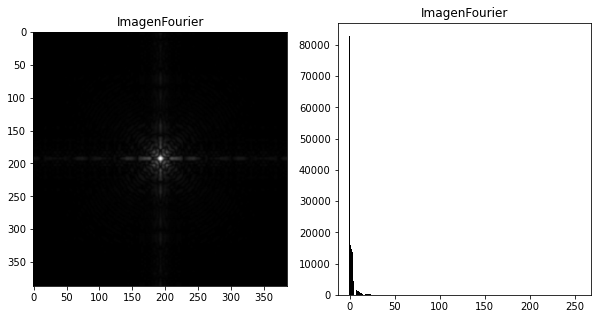

Imagen negativa


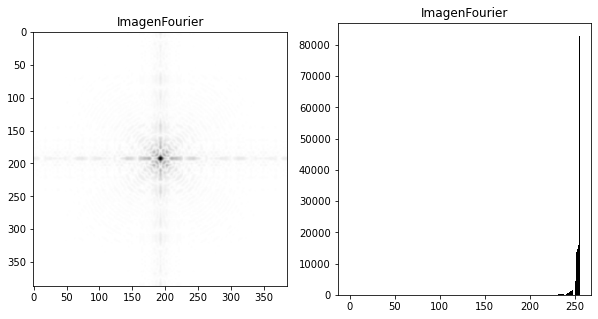

Imagen logaritmica


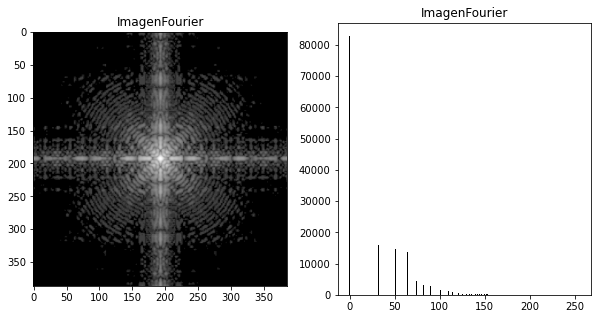

Imagen low gamma


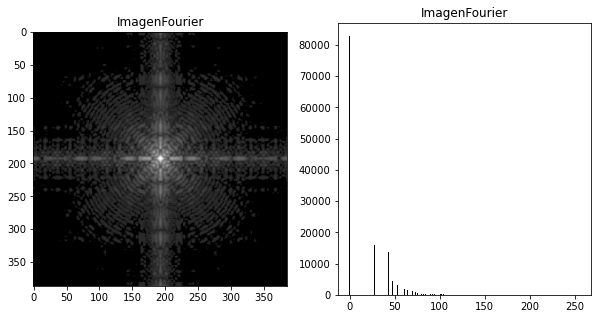

Imagen high gamma


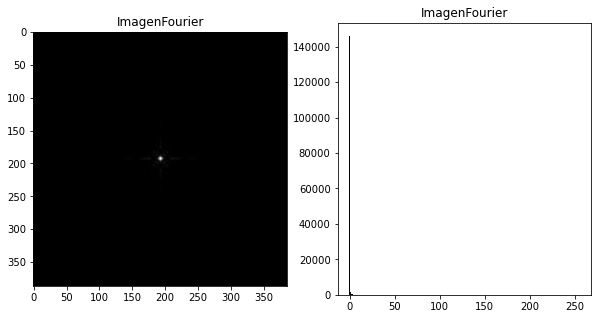

Imagen normal(Funcion Identidad)


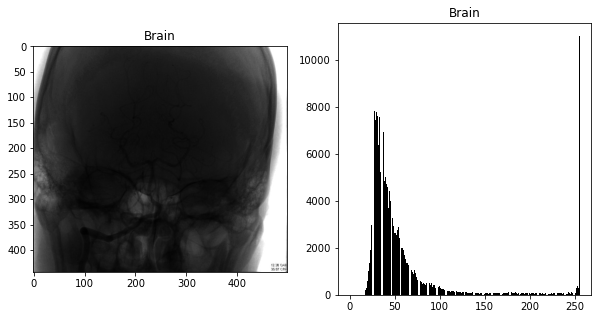

Imagen negativa


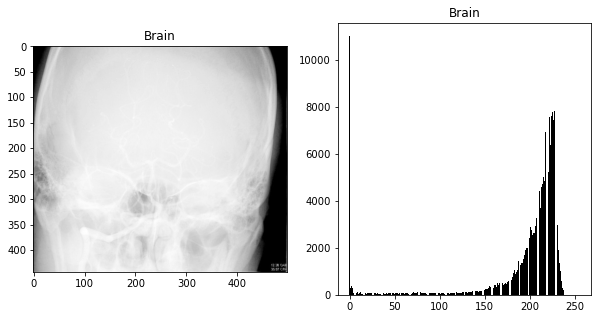

Imagen logaritmica


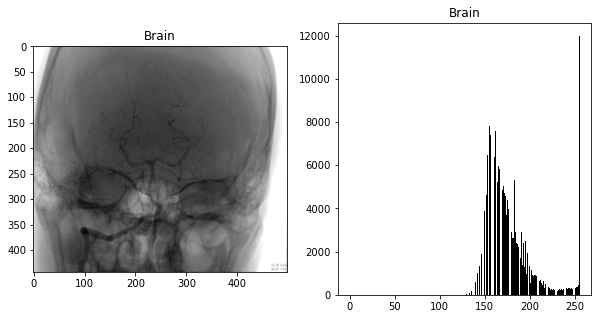

Imagen low gamma


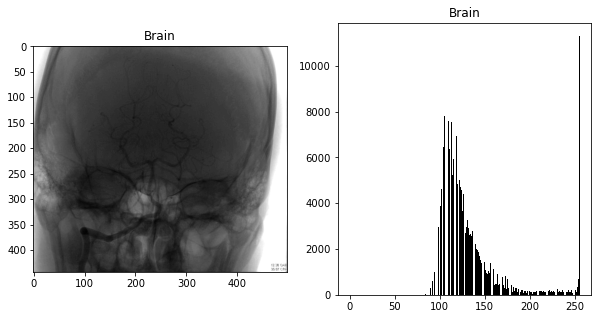

Imagen high gamma


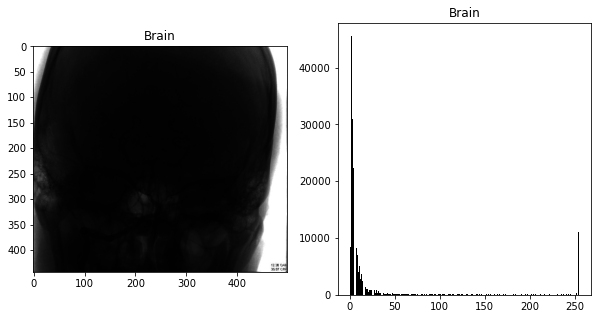

Imagen normal(Funcion Identidad)


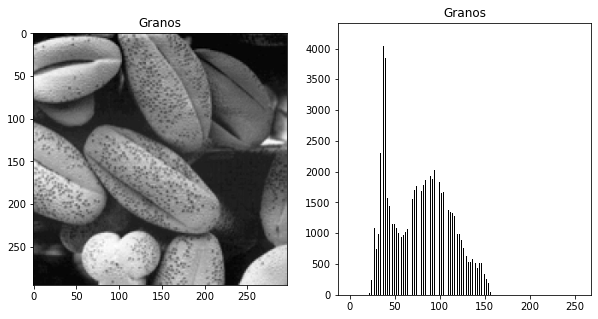

Imagen negativa


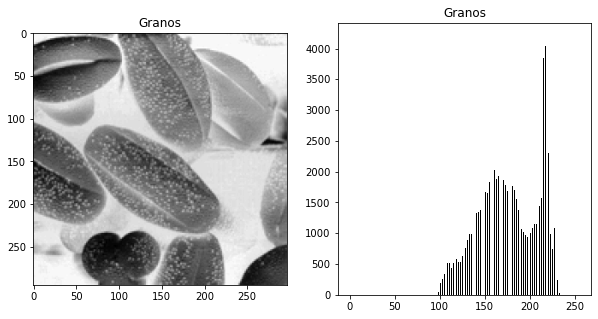

Imagen logaritmica


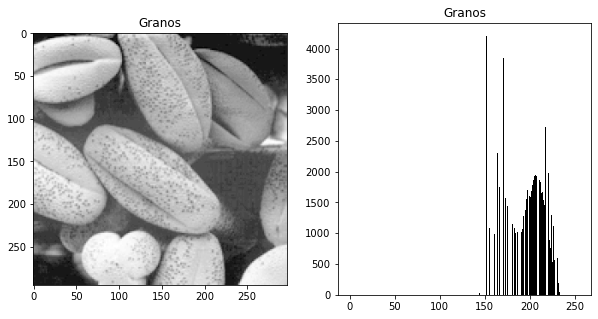

Imagen low gamma


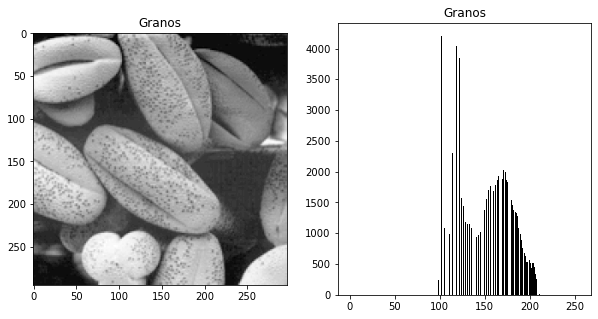

Imagen high gamma


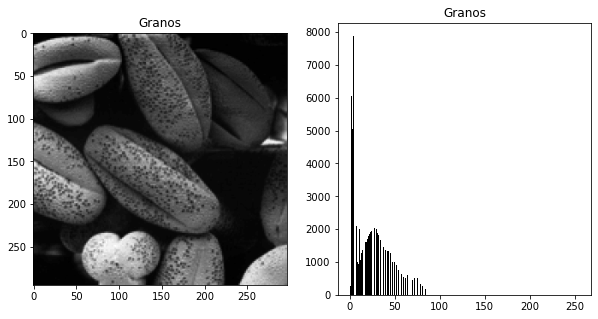

Imagen normal(Funcion Identidad)


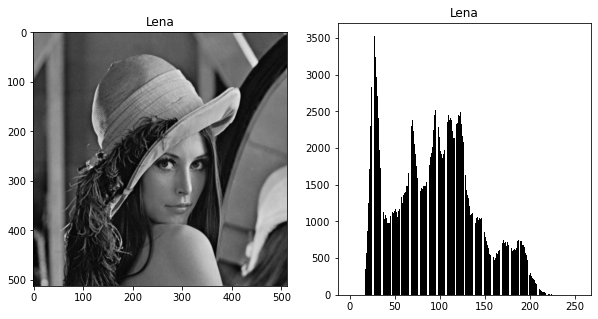

Imagen negativa


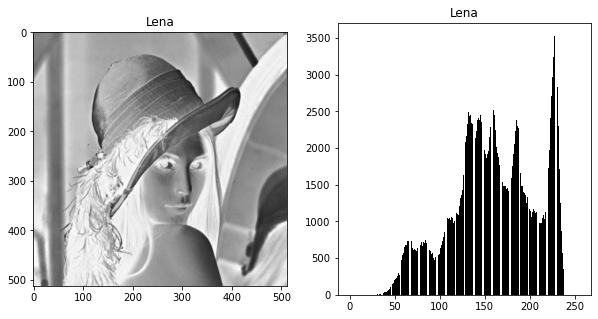

Imagen logaritmica


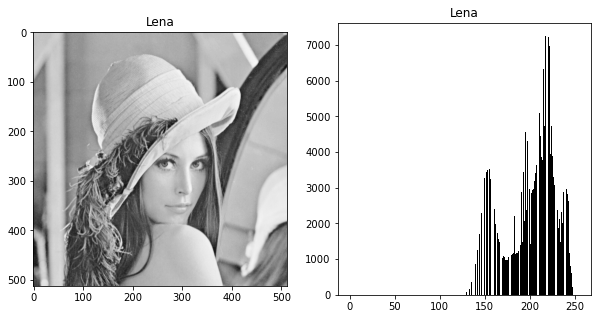

Imagen low gamma


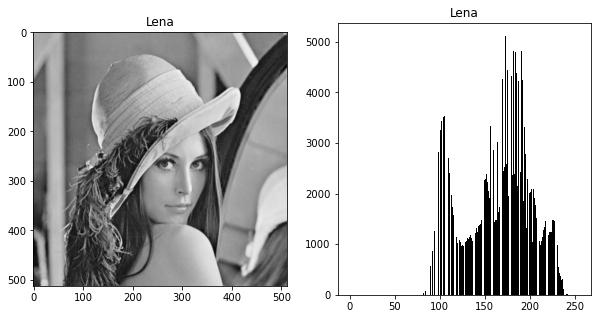

Imagen high gamma


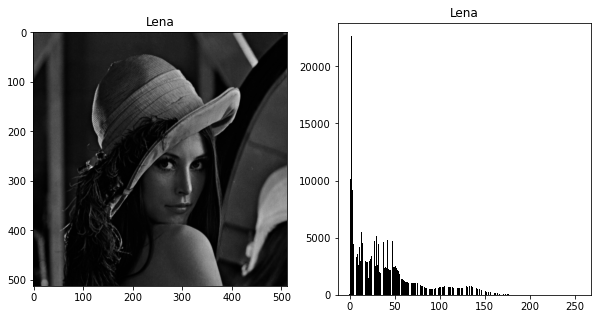

Imagen normal(Funcion Identidad)


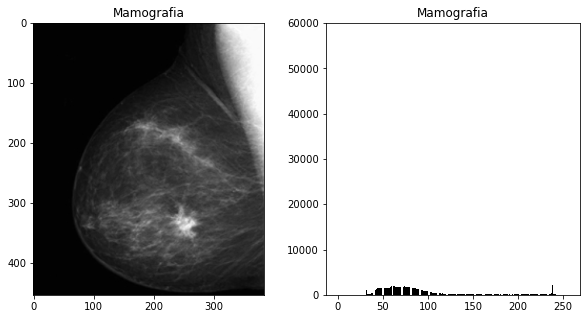

Imagen negativa


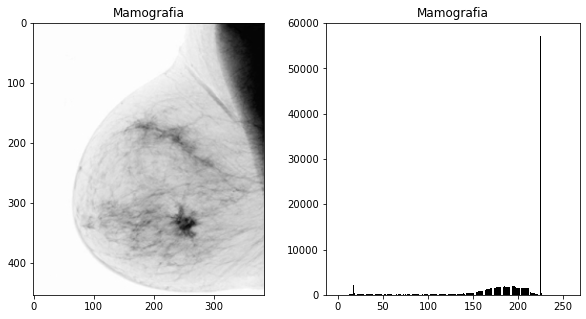

Imagen logaritmica


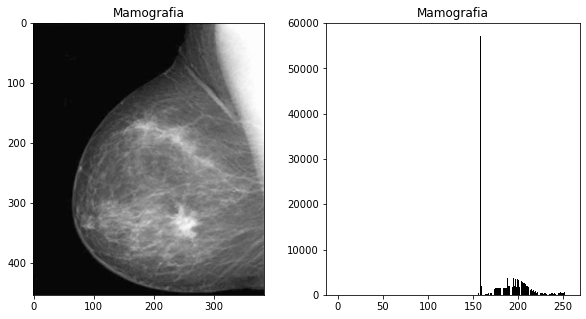

Imagen low gamma


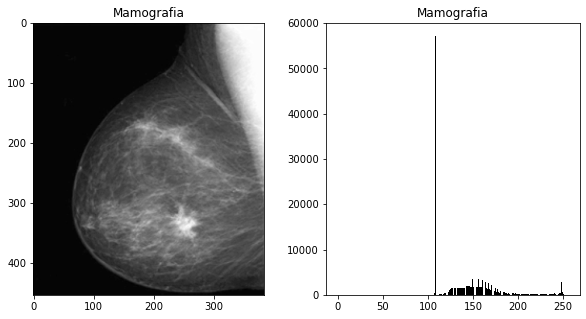

Imagen high gamma


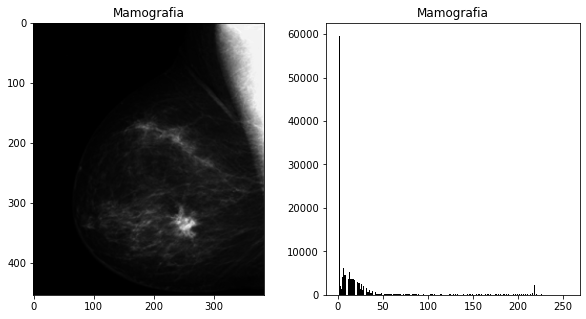

Imagen normal(Funcion Identidad)


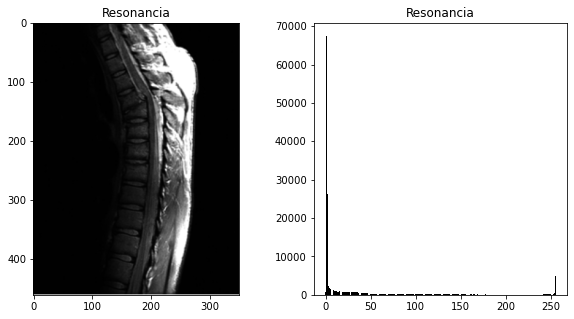

Imagen negativa


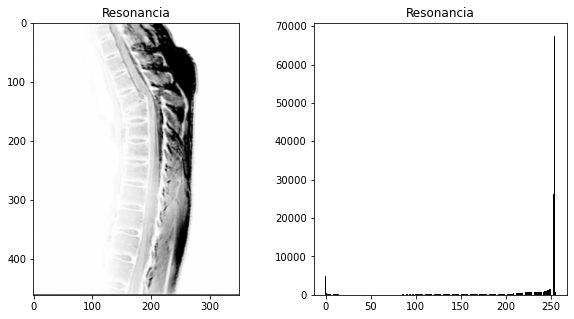

Imagen logaritmica


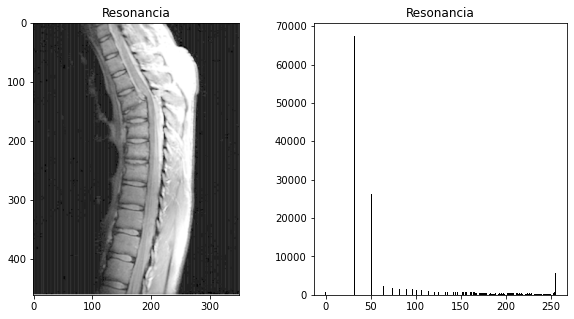

Imagen low gamma


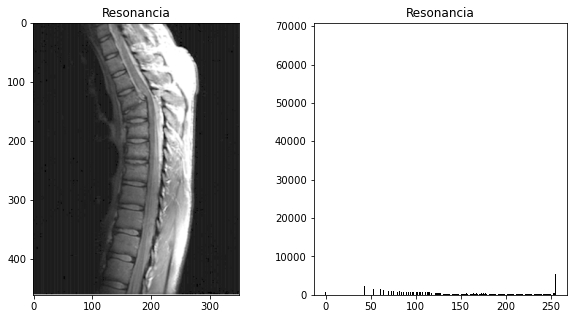

Imagen high gamma


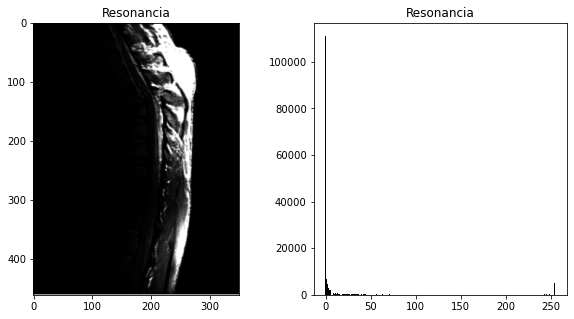

Imagen normal(Funcion Identidad)


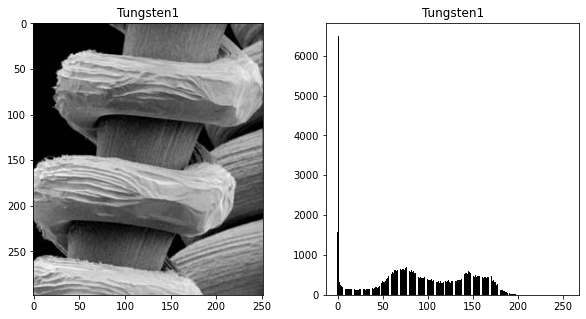

Imagen negativa


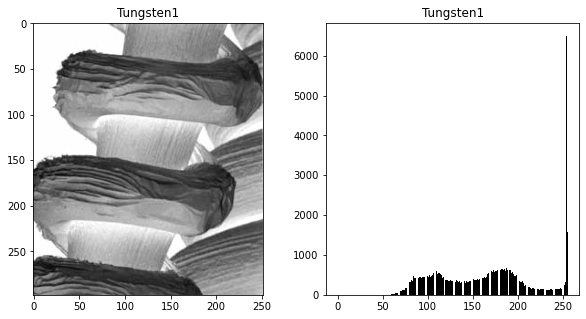

Imagen logaritmica


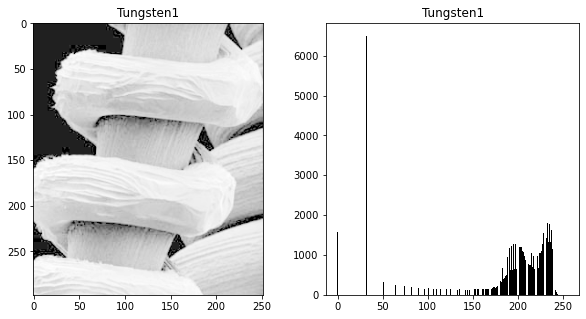

Imagen low gamma


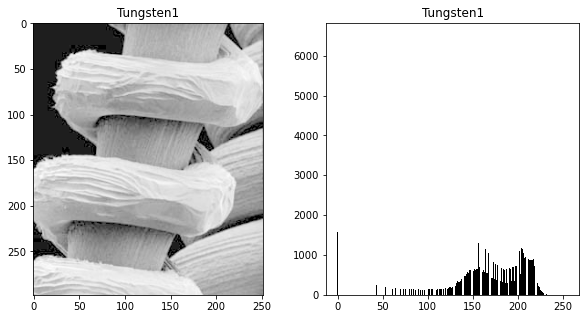

Imagen high gamma


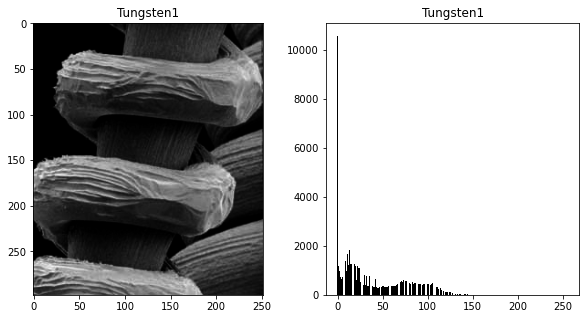

Imagen normal(Funcion Identidad)


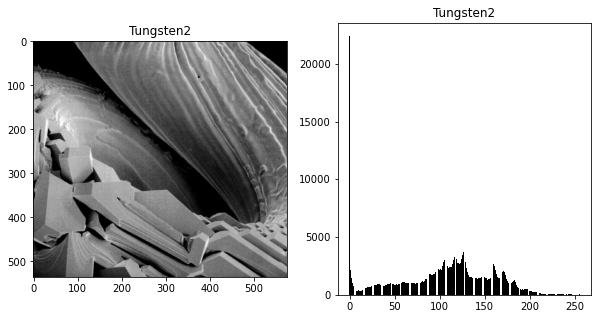

Imagen negativa


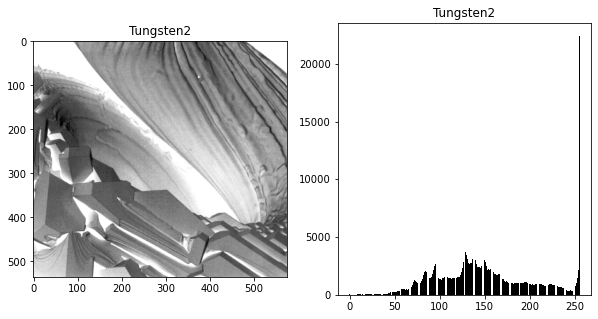

Imagen logaritmica


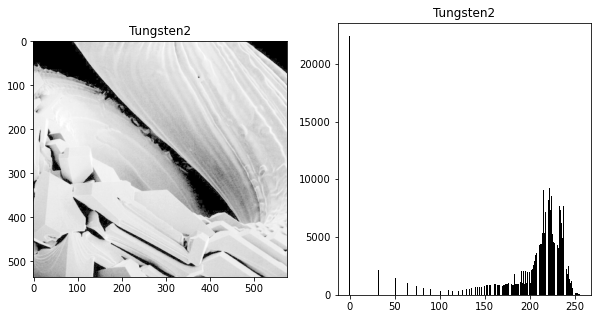

Imagen low gamma


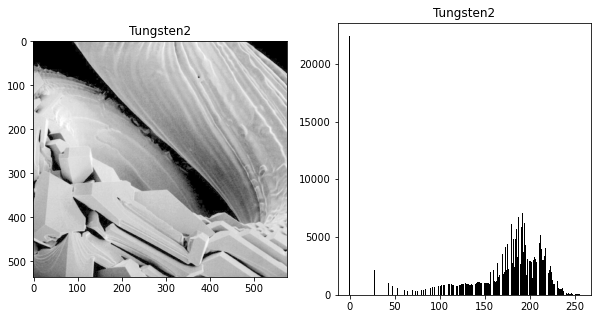

Imagen high gamma


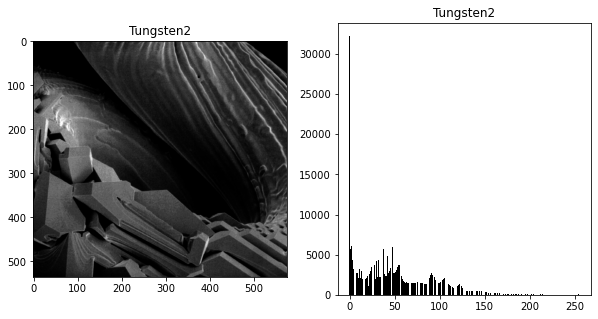

In [12]:
##Ejercicio 1 

for img in imagenes:
    print('Imagen normal(Funcion Identidad)')
    plot_img_histo((img,imagenes[img]),get_histograma(imagenes[img]))
    print('Imagen negativa')
    plot_img_histo((img,imagenes_neg[img]),get_histograma(imagenes_neg[img]))
    print('Imagen logaritmica')
    plot_img_histo((img,imagenes_log[img]),get_histograma(imagenes_log[img]))
    print('Imagen low gamma')
    plot_img_histo((img,imagenes_low_gamma[img]),get_histograma(imagenes_low_gamma[img]))
    print('Imagen high gamma')
    plot_img_histo((img,imagenes_high_gamma[img]),get_histograma(imagenes_high_gamma[img]))

Imagen normal


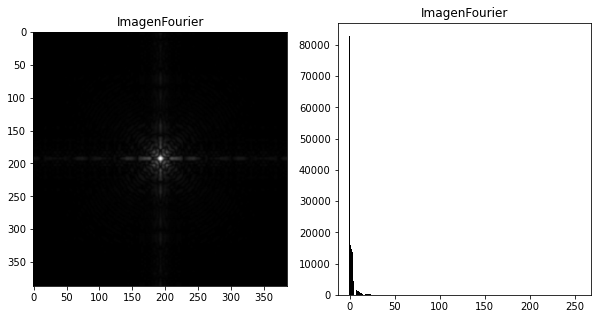

Imagen ecualizada


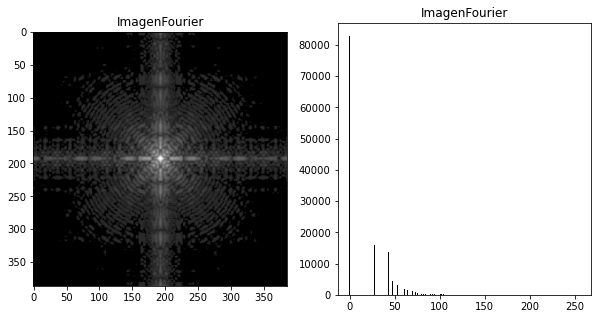

Imagen normal


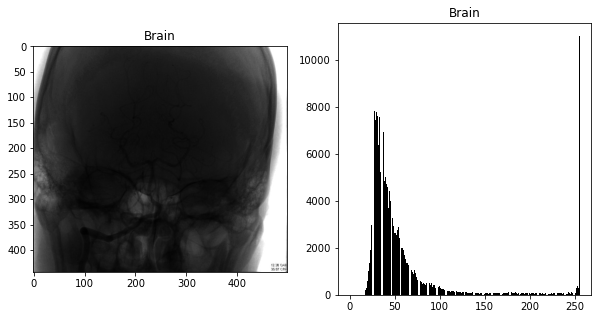

Imagen ecualizada


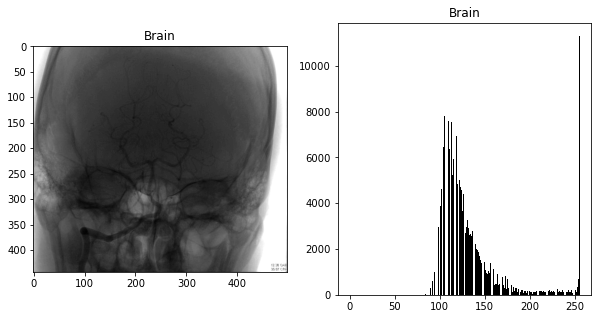

Imagen normal


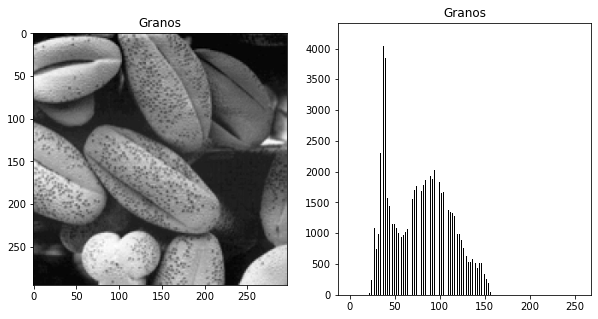

Imagen ecualizada


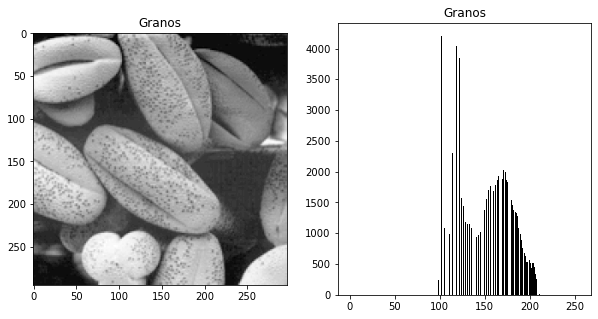

Imagen normal


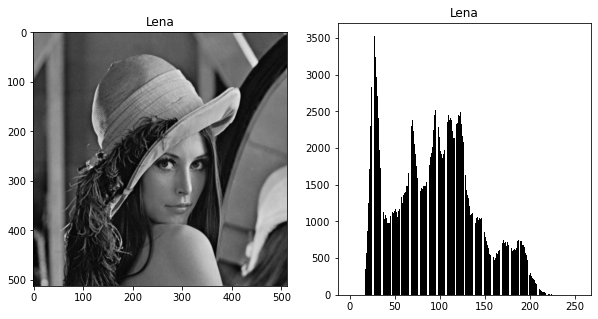

Imagen ecualizada


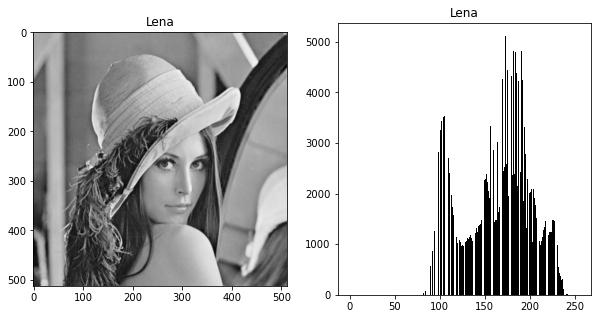

Imagen normal


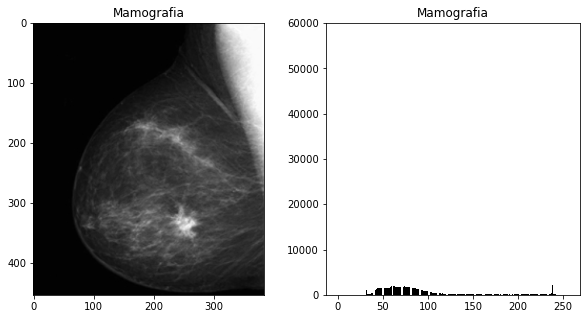

Imagen ecualizada


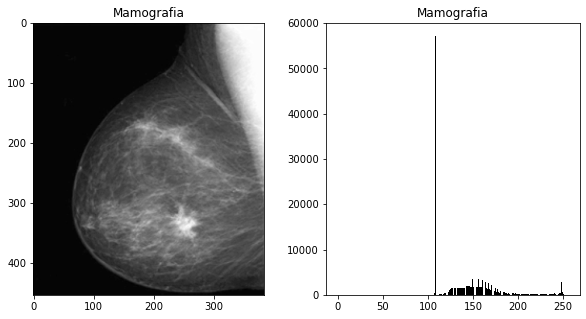

Imagen normal


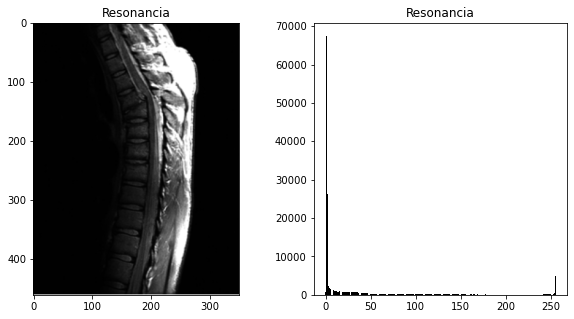

Imagen ecualizada


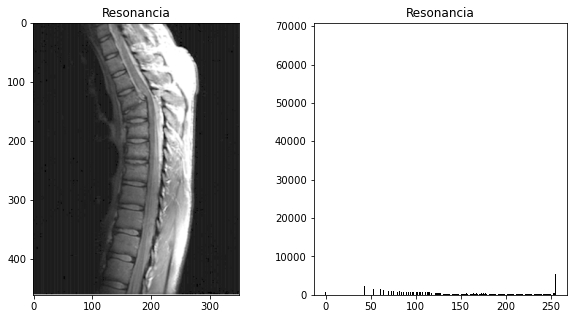

Imagen normal


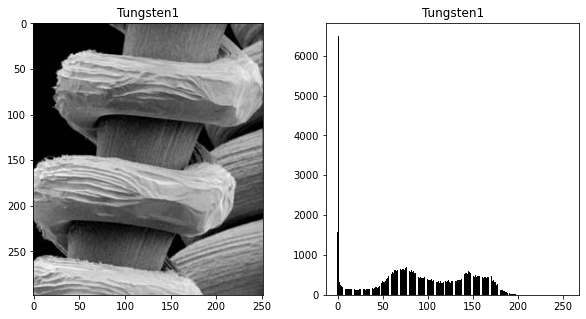

Imagen ecualizada


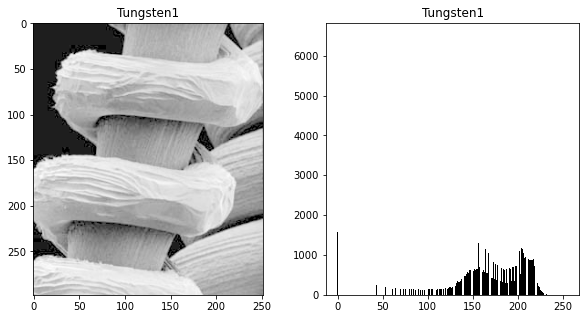

Imagen normal


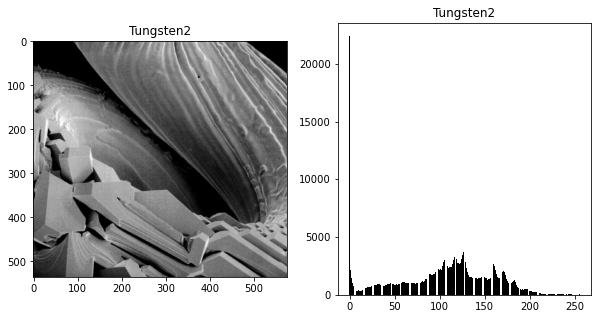

Imagen ecualizada


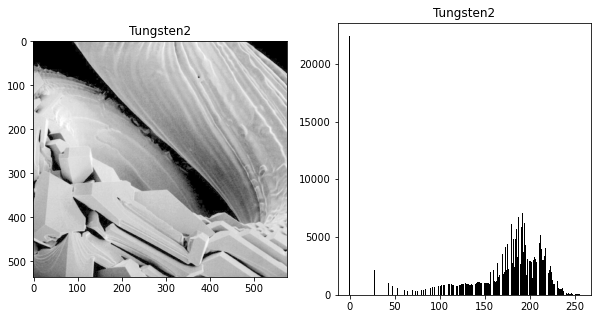

In [13]:
for img in imagenes:
    print('Imagen normal')
    plot_img_histo((img,imagenes[img]),get_histograma(imagenes[img]))
    print('Imagen ecualizada')
    plot_img_histo((img,imagenes_ecualizadas[img]),get_histograma(imagenes_ecualizadas[img]))

In [22]:
def saveImg(diccionario, filtro):
    for img in diccionario.keys():
        histograma = get_histograma(diccionario[img])
        plt.title('Histograma {} {}'.format(filtro,img))
        plt.bar(range(len(histograma)), list(histograma.values()), align='center',color = 'black')
        plt.savefig('histogramas/histograma{}_{}.jpg'.format(filtro,img))
    

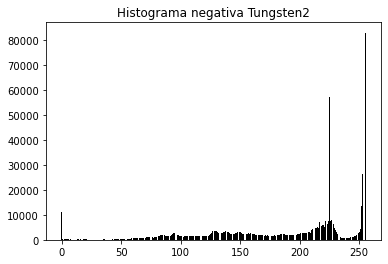

In [23]:
saveImg(imagenes_neg,'negativa')

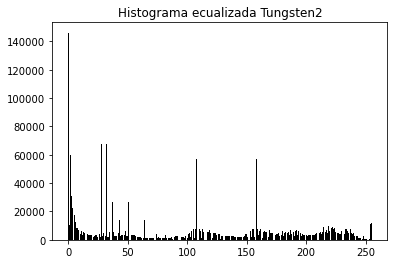

In [24]:
saveImg(imagenes_log,'logaritmica')
saveImg(imagenes_low_gamma,'low_gamma')
saveImg(imagenes_high_gamma,'high_gamma')
saveImg(imagenes_ecualizadas,'ecualizada')